# Как переименовать Columns в pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from scipy import stats
import scipy
%matplotlib inline
        
import re
from datetime import datetime, timedelta, date
import math
import ast
import json

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv('movie_bd_v5.csv')

In [7]:
df.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year'],
      dtype='object')

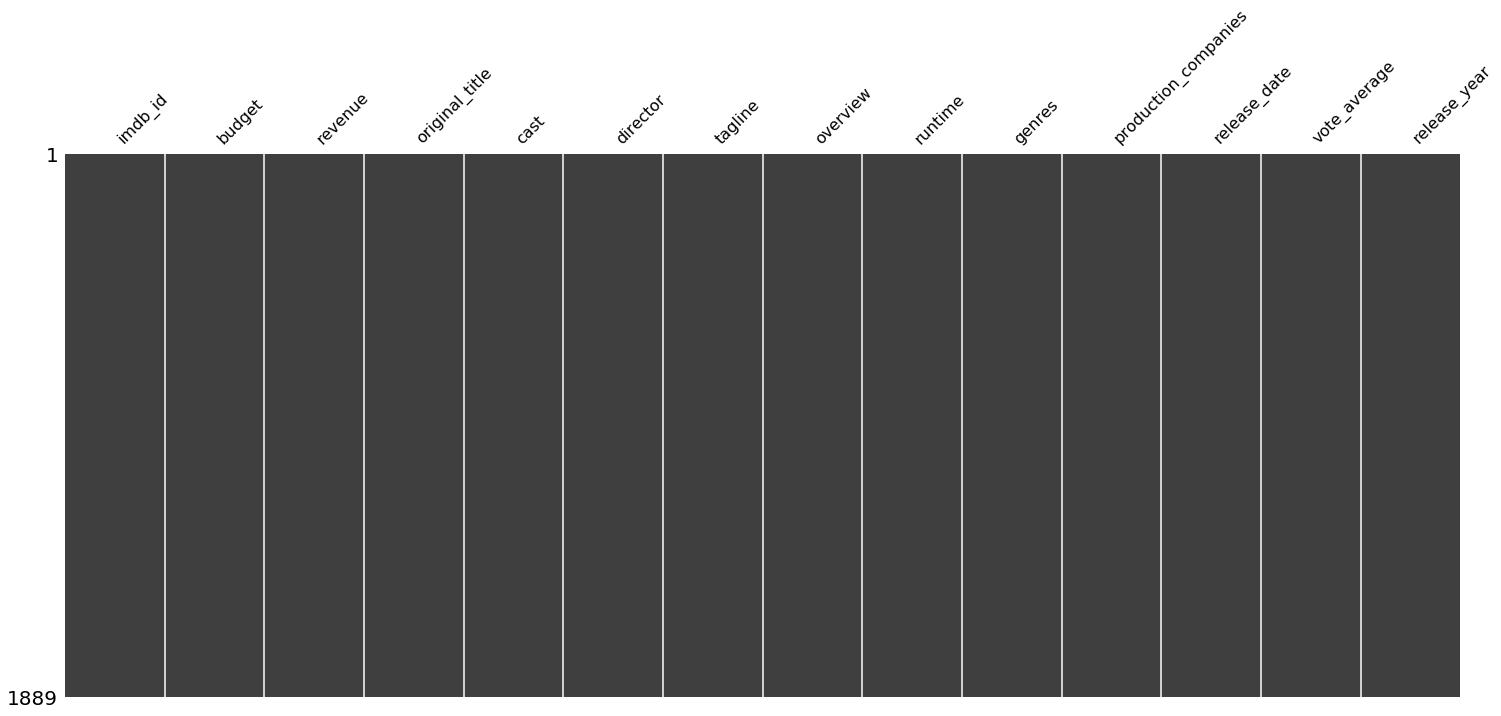

In [11]:
msno.matrix(df, sparkline=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [14]:
#df = df.rename(columns = {'Запись пользователя № - user_919':'user_numb', '[2019-01-01 14:06:51':'time'})

In [20]:
data = pd.read_csv('main_task.csv')

In [21]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [22]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

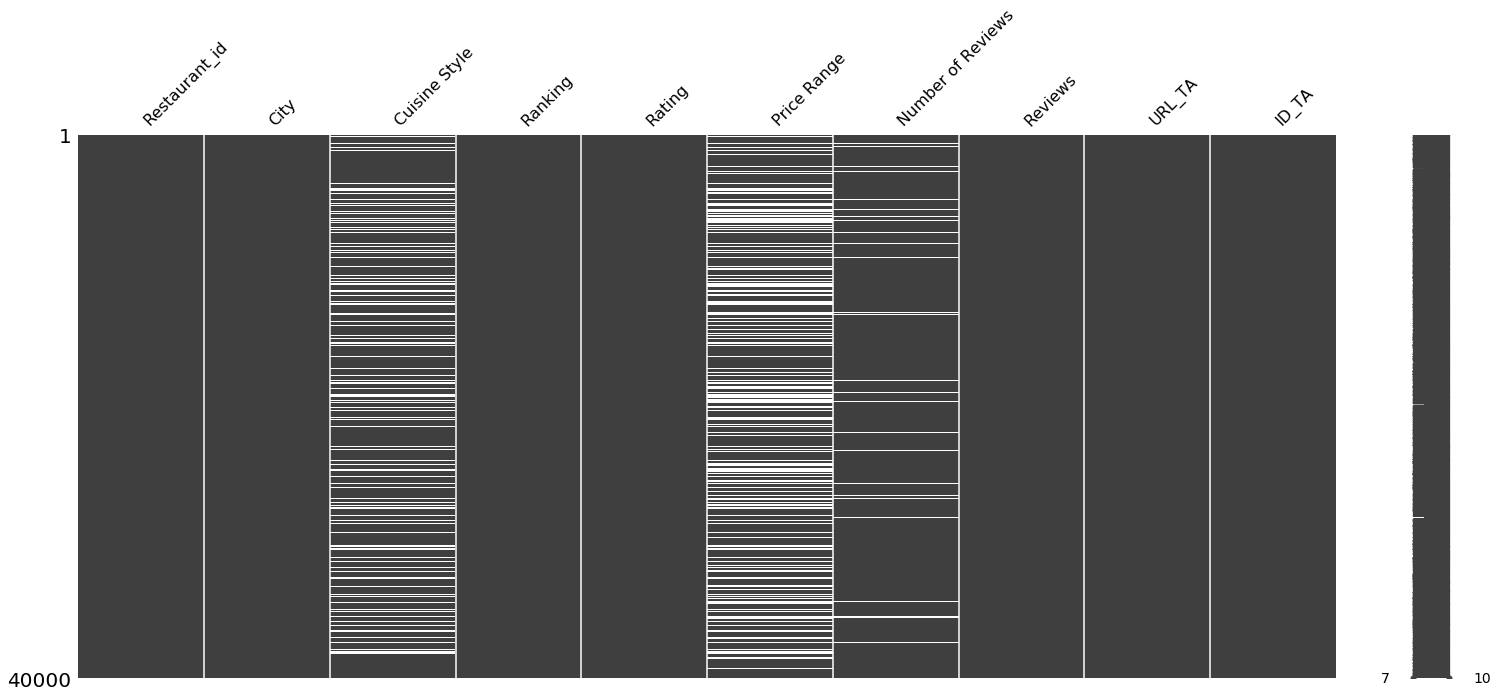

In [23]:
msno.matrix(data, sparkline='False')

In [27]:
data[:0]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA


In [36]:
data_col = list(data.columns)
new_col = []

In [37]:
for col in data_col:
    new_col.append(col.replace(' ', '_').lower())

In [38]:
new_col

['restaurant_id',
 'city',
 'cuisine_style',
 'ranking',
 'rating',
 'price_range',
 'number_of_reviews',
 'reviews',
 'url_ta',
 'id_ta']

In [39]:
data.columns = new_col

In [43]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
       'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta'],
      dtype='object')

,missing_values,percent
price_range,13886,34.72
cuisine_style,9283,23.21
number_of_reviews,2543,6.36
restaurant_id,0,0.00
city,0,0.00
ranking,0,0.00
rating,0,0.00
reviews,0,0.00
url_ta,0,0.00
id_ta,0,0.00


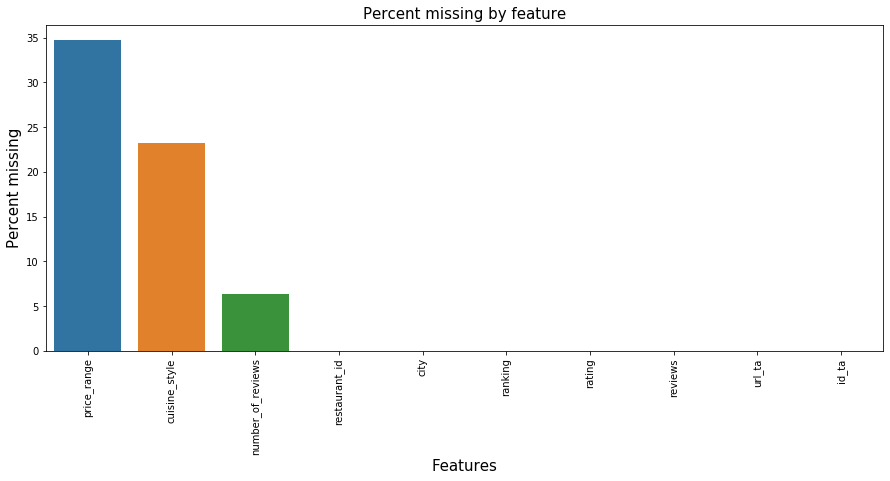

In [44]:
def na_checks(dataset):
    """Функция для визуализации пропусков в датасете"""
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = round((dataset.isnull().sum()/dataset.isnull().count()
                     ).sort_values(ascending=False)*100, 2)
    missing_data = pd.concat([total, percent], axis=1, keys=[
                             'missing_values', 'percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent missing', fontsize=15)
    plt.title('Percent missing by feature', fontsize=15)
    return missing_data

na_checks(data)

In [45]:
data.duplicated(subset=None, keep='first').value_counts()

False    40000
dtype: int64

In [46]:
data.describe

<bound method NDFrame.describe of       restaurant_id       city  \
0           id_5569      Paris   
1           id_1535  Stockholm   
2            id_352     London   
3           id_3456     Berlin   
4            id_615     Munich   
...             ...        ...   
39995        id_499      Milan   
39996       id_6340      Paris   
39997       id_1649  Stockholm   
39998        id_640     Warsaw   
39999       id_4824      Milan   

                                           cuisine_style  ranking  rating  \
0                ['European', 'French', 'International']   5570.0     3.5   
1                                                    NaN   1537.0     4.0   
2      ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...    353.0     4.5   
3                                                    NaN   3458.0     5.0   
4      ['German', 'Central European', 'Vegetarian Fri...    621.0     4.0   
...                                                  ...      ...     ...   
39995  ['Italian',

In [12]:
df

,user_numb,time,Unnamed: 2,Unnamed: 3
0,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
1,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
2,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
4,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,NaN
...,...,...,...,...
994,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,NaN
995,#error,NaN,10054.0,29265.0
996,#error,NaN,10454.0,NaN
997,#error,NaN,1000.0,NaN


# Как найти пропуски Pandas (isna)

In [13]:
df['time'].isna().sum()

15

# Удаление пропусков
Пропуски можно удалять автоматически. Во многих случаях это правильно, так как данные с большим количеством пропусков часто не имеют смысла и не приносят никакой пользы.  

Удалять данные с пропусками можно с помощью метода dropna().

Параметр axis в методе dropna() говорит методу, по какой оси удалять значения.  

Если нужно удалить строки, в которых встречается пропуск (NaN), следует указать axis=0.  Зачем это делать? Например, у нас из 1000 примеров данных про пользователей пропуски есть в пяти. Разумно их удалить, так как их количество пренебрежимо мало.
Если нужно удалить столбцы, в которых встречается пропуск (NaN), нужно указывать axis=1. Зачем? Иногда в одном конкретном столбце пропусков настолько много, что с ними просто не хочется возиться - смысла в них все равно почти нет. 
Еще один интересный параметр - subset. Что он делает? Если передать в него список значений по одной оси (например, названия столбцов) и задать при этом в параметре axis другую ось (в нашем случае 0), то мы удалим те строки, для которых в данных столбцах находится пропуск. То же самое работает и наоборот: нужно поменять axis на 1 и вместо названий столбцов передавать индексы строк.

In [14]:
# log.dropna(axis=0)

# Replace Pandas

In [16]:
df['time'] = df['time'].str.replace('[', '')

In [17]:
df

,user_numb,time,Unnamed: 2,Unnamed: 3
0,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
1,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
2,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN
4,Запись пользователя № - user_917,2019-01-01 23:34:55,156789.0,NaN
...,...,...,...,...
994,Запись пользователя № - user_984,2019-04-20 9:59:58,9754.0,NaN
995,#error,NaN,10054.0,29265.0
996,#error,NaN,10454.0,NaN
997,#error,NaN,1000.0,NaN


In [18]:
df['time'] = pd.to_datetime(df['time'])

In [19]:
df

,user_numb,time,Unnamed: 2,Unnamed: 3
0,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
1,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
2,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN
4,Запись пользователя № - user_917,2019-01-01 23:34:55,156789.0,NaN
...,...,...,...,...
994,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,NaN
995,#error,NaT,10054.0,29265.0
996,#error,NaT,10454.0,NaN
997,#error,NaT,1000.0,NaN
